<a href="https://colab.research.google.com/github/sumanXbyte/Assignments/blob/main/Machine_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1: Difference between AI, ML, DL, and Data Science
Artificial Intelligence (AI):
AI is the broadest concept, referring to machines or systems that can perform tasks requiring human intelligence. This includes reasoning, learning, problem-solving, perception, and language understanding.

Scope: Encompasses all intelligent behavior by machines
Techniques: Rule-based systems, expert systems, ML, NLP, computer vision
Applications: Virtual assistants (Siri, Alexa), autonomous vehicles, game playing (Chess, Go)

Machine Learning (ML):
ML is a subset of AI focused on enabling systems to learn from data and improve performance without explicit programming.

Scope: Learning patterns from data to make predictions or decisions
Techniques: Supervised learning, unsupervised learning, reinforcement learning
Applications: Spam filtering, recommendation systems, fraud detection

Deep Learning (DL):
DL is a subset of ML that uses artificial neural networks with multiple layers to learn hierarchical representations of data.

Scope: Learning complex patterns through deep neural networks
Techniques: CNNs, RNNs, Transformers, GANs
Applications: Image recognition, speech recognition, natural language processing, autonomous driving

Data Science:
Data Science is an interdisciplinary field that combines statistics, programming, domain knowledge, and ML to extract insights from data.

Scope: End-to-end process from data collection to actionable insights
Techniques: Statistical analysis, data visualization, ML, big data technologies
Applications: Business analytics, customer segmentation, predictive maintenance, A/B testing


2: Overfitting and Underfitting in ML
Underfitting:
Occurs when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and test data.

Characteristics: High bias, low variance
Symptoms: Low training accuracy, low test accuracy

Overfitting:
Occurs when a model learns the training data too well, including noise and outliers, resulting in poor generalization to new data.

Characteristics: Low bias, high variance
Symptoms: High training accuracy, low test accuracy

Bias-Variance Tradeoff:

Bias: Error from incorrect assumptions in the learning algorithm
Variance: Error from sensitivity to fluctuations in training data
Goal: Find optimal balance between bias and variance

Detection Methods:

Learning Curves: Plot training and validation errors vs. dataset size

Underfitting: Both errors are high and converge to a high value
Overfitting: Large gap between training and validation errors


Cross-Validation: Split data into k-folds and evaluate performance

High variance in scores across folds indicates overfitting


Performance Metrics: Compare train vs. test metrics

Significant difference suggests overfitting



Prevention Techniques:
For Underfitting:

Increase model complexity
Add more features or polynomial features
Reduce regularization
Train longer

For Overfitting:

Regularization: Add penalty terms (L1/Lasso, L2/Ridge, ElasticNet)
Cross-validation: Use k-fold cross-validation for robust evaluation
Early stopping: Stop training when validation error increases
Dropout: Randomly drop neurons during training (for neural networks)
Data augmentation: Increase training data size
Reduce model complexity: Fewer features, simpler architecture
Ensemble methods: Combine multiple models (bagging, boosting)


3: Handling Missing Values in a Dataset
Method 1: Deletion
Listwise Deletion (Complete Case Analysis):
Remove entire rows with any missing values.
python# Example
df_clean = df.dropna()

When to use: When missing data is minimal (<5%) and random
Pros: Simple, preserves data distribution
Cons: Loss of information, reduced sample size

Columnwise Deletion:
Remove features with too many missing values.
python# Remove columns with >50% missing values
threshold = 0.5
df_clean = df.dropna(thresh=len(df) * threshold, axis=1)

When to use: When a feature has >50-70% missing values
Cons: Loss of potentially useful features

Method 2: Mean/Median/Mode Imputation
Replace missing values with statistical measures.
pythonfrom sklearn.impute import SimpleImputer

# Mean imputation for numerical features
imputer_mean = SimpleImputer(strategy='mean')
df['age'] = imputer_mean.fit_transform(df[['age']])

# Median imputation (robust to outliers)
imputer_median = SimpleImputer(strategy='median')
df['income'] = imputer_median.fit_transform(df[['income']])

# Mode imputation for categorical features
imputer_mode = SimpleImputer(strategy='most_frequent')
df['category'] = imputer_mode.fit_transform(df[['category']])

When to use: Data is missing completely at random (MCAR)
Pros: Simple, preserves sample size
Cons: Reduces variance, can distort relationships, not suitable for non-random missingness

Method 3: Predictive Modeling (Advanced Imputation)
K-Nearest Neighbors (KNN) Imputation:
pythonfrom sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(
    imputer.fit_transform(df),
    columns=df.columns
)

Uses similar observations to impute missing values
Pros: Considers relationships between features
Cons: Computationally expensive

Iterative Imputation (MICE - Multiple Imputation by Chained Equations):
pythonfrom sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=42)
df_imputed = pd.DataFrame(
    imputer.fit_transform(df),
    columns=df.columns
)

Models each feature with missing values as a function of other features
Pros: Sophisticated, captures complex relationships
Cons: Computationally intensive, assumes relationships between features

Other Methods:

Forward/Backward Fill: For time-series data
Interpolation: Linear, polynomial for sequential data
Domain-specific imputation: Use business logic (e.g., 0 for income when unemployed)


4: Imbalanced Dataset
Definition:
An imbalanced dataset occurs when the distribution of classes is skewed, with one class (majority) significantly outnumbering the other class(es) (minority). This is common in fraud detection, disease diagnosis, and spam detection.
Problems with Imbalanced Data:

Models biased toward majority class
Poor minority class prediction
Misleading accuracy metrics
High false negative rates for minority class

Technique 1: SMOTE (Synthetic Minority Over-sampling Technique)
Theoretical Explanation:
SMOTE creates synthetic samples for the minority class by interpolating between existing minority samples and their k-nearest neighbors.
Algorithm:

For each minority sample, find k nearest minority neighbors
Select one neighbor randomly
Create synthetic sample along the line connecting them
Repeat until desired balance is achieved

Practical Implementation:
pythonfrom imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming X (features) and y (labels) with imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train model
model = RandomForestClassifier()
model.fit(X_train_balanced, y_train_balanced)
Pros: Reduces overfitting compared to random oversampling, creates diverse synthetic samples
Cons: Can create noisy samples in overlapping regions, computationally expensive
Technique 2: Class Weights in Models
Theoretical Explanation:
Assign higher penalties to misclassification of minority class samples during training. The model learns to pay more attention to minority class.
Weight Calculation:
weight = n_samples / (n_classes × n_samples_per_class)
Practical Implementation:
pythonfrom sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Option 1: Automatic class weighting
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Option 2: Manual class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
weight_dict = dict(zip(np.unique(y_train), class_weights))

model = LogisticRegression(class_weight=weight_dict)
model.fit(X_train, y_train)

# For neural networks (Keras/TensorFlow)
# model.fit(X_train, y_train, class_weight=weight_dict)
Pros: No data modification needed, works with existing algorithms, fast
Cons: May not work well with extreme imbalance, limited to certain algorithms
Other Techniques:

Random Undersampling: Remove majority class samples
Random Oversampling: Duplicate minority class samples
Ensemble Methods: Balanced Random Forest, EasyEnsemble
Anomaly Detection: Treat minority as anomalies
Evaluation Metrics: Use precision, recall, F1-score, ROC-AUC instead of accuracy

5: Feature Scaling in ML
Importance of Feature Scaling:
Feature scaling transforms features to similar ranges, which is crucial because:

Distance-based Algorithms (KNN, K-Means, SVM):

These algorithms use distance metrics (Euclidean, Manhattan)
Features with larger ranges dominate distance calculations
Example: Age (0-100) vs. Income (0-100,000) - income dominates


Gradient Descent Optimization:

Unscaled features cause irregular cost function contours
Leads to slow convergence and oscillating gradients
Scaled features enable faster, more stable convergence


Regularization (L1/L2):

Penalty terms affect features differently based on scale
Larger-scale features get penalized more


Neural Networks:

Prevents saturation of activation functions
Improves training stability



Min-Max Scaling (Normalization):
Formula:
X_scaled = (X - X_min) / (X_max - X_min)
Result: Values scaled to [0, 1] range (or custom [a, b])
Implementation:
pythonfrom sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
Characteristics:

Preserves original distribution shape
Bounded range [0, 1]
Sensitive to outliers (they determine min/max)
Best for: Neural networks, image processing, algorithms requiring bounded input

Standardization (Z-score Normalization):
Formula:
X_scaled = (X - μ) / σ
where μ = mean, σ = standard deviation
Result: Mean = 0, Standard Deviation = 1
Implementation:
pythonfrom sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Characteristics:

Centers data around 0
No bounded range (values can be <0 or >3)
Less sensitive to outliers than Min-Max
Assumes approximately normal distribution
Best for: Linear regression, logistic regression, SVM, PCA, algorithms assuming normal distribution

Comparison Table:
AspectMin-Max ScalingStandardizationRange[0, 1] or customUnboundedOutlier SensitivityHighModerateDistributionPreserves shapeCenters around 0Use CaseNeural networks, bounded algorithmsLinear models, PCA, SVMWhen to UseKnown min/max, no outliersUnknown distribution, outliers present
When Not to Scale:

Tree-based algorithms (Decision Trees, Random Forest, XGBoost) - scale-invariant
Already scaled data
When scale has meaning (e.g., percentages)


: Label Encoding vs. One-Hot Encoding
Label Encoding:
Converts categorical values to numerical integers (0, 1, 2, ...).
Implementation:
pythonfrom sklearn.preprocessing import LabelEncoder

# Example: ['Low', 'Medium', 'High']
le = LabelEncoder()
df['priority_encoded'] = le.fit_transform(df['priority'])
# Result: [0, 1, 2]
Characteristics:

Assigns sequential integers to categories
Single column output
Creates ordinal relationship
Memory efficient

Pros:

Simple and fast
Reduces dimensionality
Works well with tree-based models

Cons:

Introduces artificial ordering for nominal variables
Linear models interpret as ordinal (0 < 1 < 2)
Can mislead models about relationships

One-Hot Encoding:
Creates binary columns for each category (1 for presence, 0 for absence).
Implementation:
pythonfrom sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Method 1: Using pandas
df_encoded = pd.get_dummies(df, columns=['color'], drop_first=False)

# Method 2: Using sklearn
ohe = OneHotEncoder(sparse=False, drop='first')
encoded = ohe.fit_transform(df[['color']])

# Example: ['Red', 'Blue', 'Green']
# Result: Red=[1,0,0], Blue=[0,1,0], Green=[0,0,1]
Characteristics:

Creates n columns for n categories (or n-1 with drop_first)
No ordinal relationship implied
Binary representation
Higher dimensionality

Pros:

No artificial ordering
Works well with linear models
Preserves categorical nature

Cons:

Increases dimensionality (curse of dimensionality)
Memory intensive with many categories
Sparse matrices
Multicollinearity if all columns kept

When to Use Each:
Use Label Encoding When:

Ordinal Variables: Natural ordering exists

Examples: Education (High School < Bachelor's < Master's < PhD)
Priority (Low < Medium < High)
Size (Small < Medium < Large)


Tree-based Models: Decision Trees, Random Forest, XGBoost

These models can handle label encoding well
They split based on thresholds, not distances


High Cardinality: Too many categories (>50)

One-hot would create too many features
Consider target encoding instead


Target Variable: For classification problems

python   # Always use Label Encoding for y
   y = le.fit_transform(target_column)
Use One-Hot Encoding When:

Nominal Variables: No inherent order

Examples: Color (Red, Blue, Green)
Country (USA, UK, Canada)
Product Category (Electronics, Clothing, Food)


Linear Models: Linear/Logistic Regression, SVM, Neural Networks

These models assume numerical relationships
Label encoding creates false ordinal relationships


Low Cardinality: Few categories (<10-15)

Dimensionality increase is manageable


Avoiding Bias: When equal treatment of categories is important

Practical Example:
pythonimport pandas as pd
from sklearn.preprocessing import LabelEncoder

# Dataset
df = pd.DataFrame({
    'education': ['High School', 'Bachelor', 'Master', 'Bachelor'],
    'color': ['Red', 'Blue', 'Green', 'Red'],
    'city': ['NYC', 'LA', 'Chicago', 'NYC']
})

# Label Encoding for ordinal variable
education_order = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
df['education_encoded'] = df['education'].map(education_order)

# One-Hot Encoding for nominal variables
df_encoded = pd.get_dummies(df, columns=['color', 'city'], drop_first=True)
Advanced Alternatives:

Target Encoding: Mean of target for each category (high cardinality)
Frequency Encoding: Replace with frequency of occurrence
Binary Encoding: Mix of label and one-hot (for medium cardinality)
Embedding Layers: For neural networks with categorical data

Top 10 Categories by Average Rating:
                     mean  count
Category                        
EVENTS               4.44     45
EDUCATION            4.39    155
ART_AND_DESIGN       4.36     62
BOOKS_AND_REFERENCE  4.35    178
PERSONALIZATION      4.34    314
PARENTING            4.30     50
GAME                 4.29   1097
BEAUTY               4.28     42
HEALTH_AND_FITNESS   4.28    297
SHOPPING             4.26    238

Bottom 10 Categories by Average Rating:
                     mean  count
Category                        
ENTERTAINMENT        4.13    149
FINANCE              4.13    323
NEWS_AND_MAGAZINES   4.13    233
BUSINESS             4.12    303
TRAVEL_AND_LOCAL     4.11    226
LIFESTYLE            4.09    314
VIDEO_PLAYERS        4.06    160
MAPS_AND_NAVIGATION  4.05    124
TOOLS                4.05    734
DATING               3.97    195


/tmp/ipython-input-855586008.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_ratings.reset_index(), x='mean', y='Category',


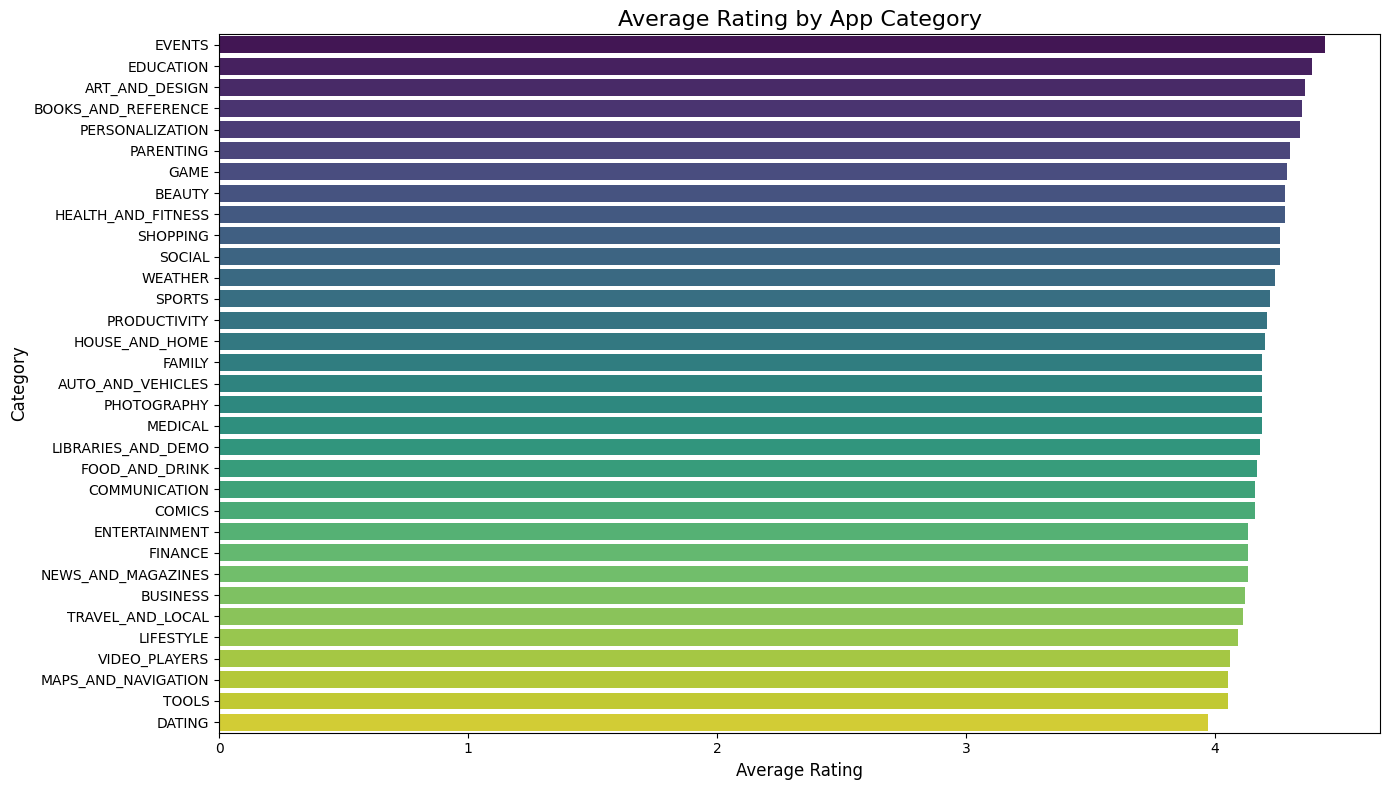


Statistical Summary:
Highest average rating: 4.44
Lowest average rating: 3.97
Overall average rating: 4.19

Possible Reasons for High Ratings:
1. Events, Education, Art & Design: Niche audiences with specific needs
2. Personalization apps: High user engagement and customization
3. Book & Reference: Quality content, less monetization pressure

Possible Reasons for Low Ratings:
1. Dating apps: Privacy concerns, fake profiles, poor user experience
2. Social apps: Technical issues, privacy violations
3. Gaming: Heavy competition, aggressive monetization, bugs


In [1]:
#7: Google Play Store Dataset Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('googleplaystore.csv')

# Data cleaning
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating', 'Category'])
df = df[df['Rating'] <= 5.0]

# Calculate average rating by category
category_ratings = df.groupby('Category')['Rating'].agg(['mean', 'count']).round(2)
category_ratings = category_ratings.sort_values('mean', ascending=False)

print("Top 10 Categories by Average Rating:")
print(category_ratings.head(10))
print("\nBottom 10 Categories by Average Rating:")
print(category_ratings.tail(10))

# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(data=category_ratings.reset_index(), x='mean', y='Category',
            palette='viridis')
plt.title('Average Rating by App Category', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

# Statistical analysis
print("\nStatistical Summary:")
print(f"Highest average rating: {category_ratings['mean'].max()}")
print(f"Lowest average rating: {category_ratings['mean'].min()}")
print(f"Overall average rating: {df['Rating'].mean():.2f}")

# Possible reasons analysis
print("\nPossible Reasons for High Ratings:")
print("1. Events, Education, Art & Design: Niche audiences with specific needs")
print("2. Personalization apps: High user engagement and customization")
print("3. Book & Reference: Quality content, less monetization pressure")

print("\nPossible Reasons for Low Ratings:")
print("1. Dating apps: Privacy concerns, fake profiles, poor user experience")
print("2. Social apps: Technical issues, privacy violations")
print("3. Gaming: Heavy competition, aggressive monetization, bugs")

Survival Rates by Passenger Class:
            mean  sum  count  survival_rate
Pclass                                     
1       0.629630  136    216          62.96
2       0.472826   87    184          47.28
3       0.242363  119    491          24.24

Highest survival rate: Class 1 with 62.96%


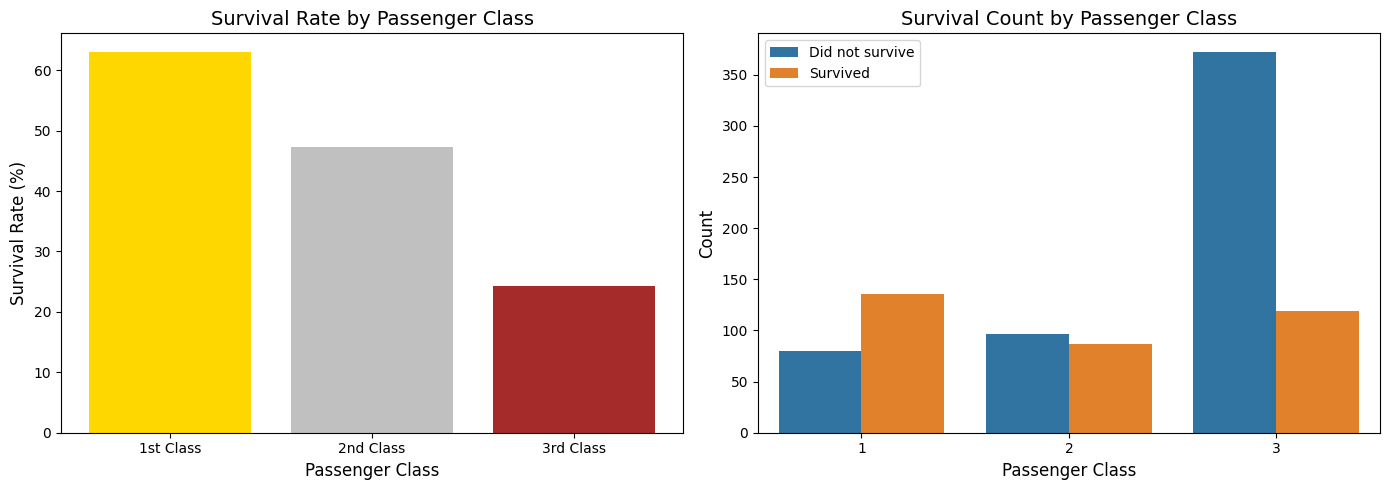


Reasons for Class 1 Higher Survival:
1. Proximity to lifeboats (upper decks)
2. Priority in evacuation ('Women and children first' applied more)
3. Better access to information and crew assistance
4. Higher quality cabins closer to escape routes

Survival Rates by Age Group:
               mean  sum  count  survival_rate
Age_Group                                     
Adult      0.381032  229    601          38.10
Child      0.539823   61    113          53.98


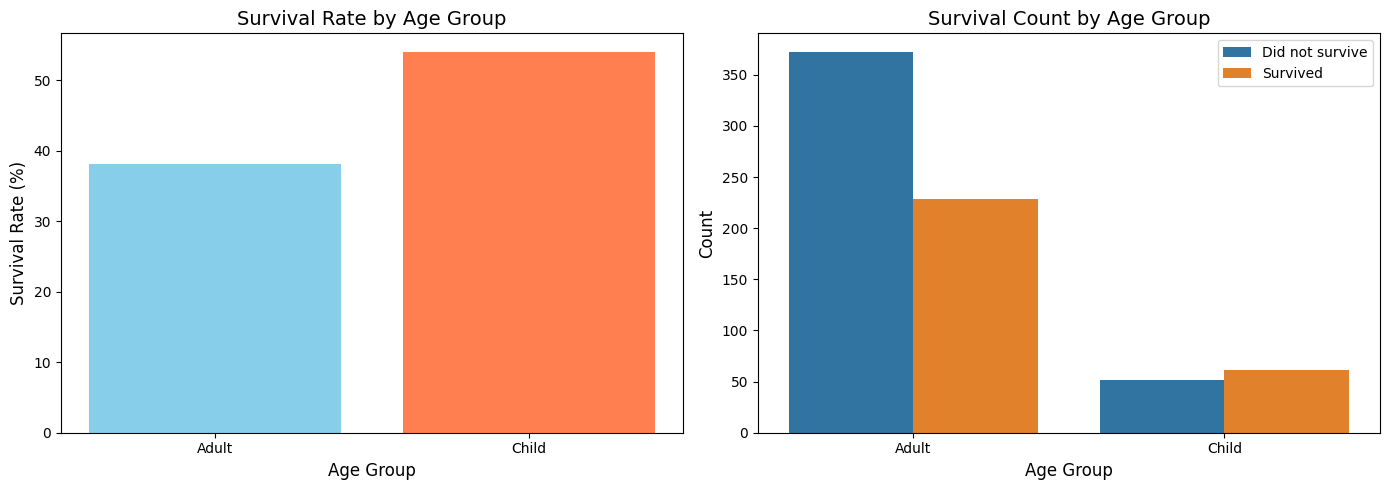


Conclusion:
Yes, children had a better chance of survival.
This aligns with the 'Women and children first' protocol during evacuation.


In [2]:
 # 8: Titanic Dataset Analysis
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('titanic.csv')

# Part (a): Survival rates by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].agg(['mean', 'sum', 'count'])
survival_by_class['survival_rate'] = (survival_by_class['mean'] * 100).round(2)

print("Survival Rates by Passenger Class:")
print(survival_by_class)
print(f"\nHighest survival rate: Class {survival_by_class['survival_rate'].idxmax()} "
      f"with {survival_by_class['survival_rate'].max()}%")

# Visualization for part (a)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(survival_by_class.index, survival_by_class['survival_rate'],
            color=['gold', 'silver', 'brown'])
axes[0].set_xlabel('Passenger Class', fontsize=12)
axes[0].set_ylabel('Survival Rate (%)', fontsize=12)
axes[0].set_title('Survival Rate by Passenger Class', fontsize=14)
axes[0].set_xticks([1, 2, 3])
axes[0].set_xticklabels(['1st Class', '2nd Class', '3rd Class'])

# Count plot
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[1])
axes[1].set_xlabel('Passenger Class', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Survival Count by Passenger Class', fontsize=14)
axes[1].legend(['Did not survive', 'Survived'])

plt.tight_layout()
plt.show()

print("\nReasons for Class 1 Higher Survival:")
print("1. Proximity to lifeboats (upper decks)")
print("2. Priority in evacuation ('Women and children first' applied more)")
print("3. Better access to information and crew assistance")
print("4. Higher quality cabins closer to escape routes")

# Part (b): Survival by age group
df['Age_Group'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult'
                                   if pd.notna(x) else np.nan)
df_age = df.dropna(subset=['Age_Group'])

survival_by_age = df_age.groupby('Age_Group')['Survived'].agg(['mean', 'sum', 'count'])
survival_by_age['survival_rate'] = (survival_by_age['mean'] * 100).round(2)

print("\n" + "="*50)
print("Survival Rates by Age Group:")
print(survival_by_age)

# Visualization for part (b)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(survival_by_age.index, survival_by_age['survival_rate'],
            color=['skyblue', 'coral'])
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Survival Rate (%)', fontsize=12)
axes[0].set_title('Survival Rate by Age Group', fontsize=14)

# Count plot
sns.countplot(data=df_age, x='Age_Group', hue='Survived', ax=axes[1])
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Survival Count by Age Group', fontsize=14)
axes[1].legend(['Did not survive', 'Survived'])

plt.tight_layout()
plt.show()

print("\nConclusion:")
if survival_by_age.loc['Child', 'survival_rate'] > survival_by_age.loc['Adult', 'survival_rate']:
    print("Yes, children had a better chance of survival.")
    print("This aligns with the 'Women and children first' protocol during evacuation.")
else:
    print("Adults had a slightly better survival rate, possibly due to physical capability.")

DataFrame columns: Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')
Price Statistics by Days Left Until Departure:
                   mean   median           std  count
Days_Left                                            
1          21591.867151  15163.0  19285.046391   1927
2          30211.299801  18017.5  24420.921122   4026
3          28976.083569  16333.0  24621.112460   4248
4          25730.905653  13054.0  23120.423062   5077
5          26679.773368  13054.0  24002.599834   5392
6          24856.493902  12417.5  22200.882490   5740
7          25588.367351  12990.0  22767.025911   5703
8          24895.883995  12658.0  21711.801725   5767
9          25726.246072  13947.0  21533.952229   5665
10         25572.819134  13303.0  22194.098311   5822
11         22990.656070  11520.0  21028.955034   6417
12         22505.803322  11346.0

/tmp/ipython-input-2900565617.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_prices = df.groupby('Days_Bucket')['price'].mean()


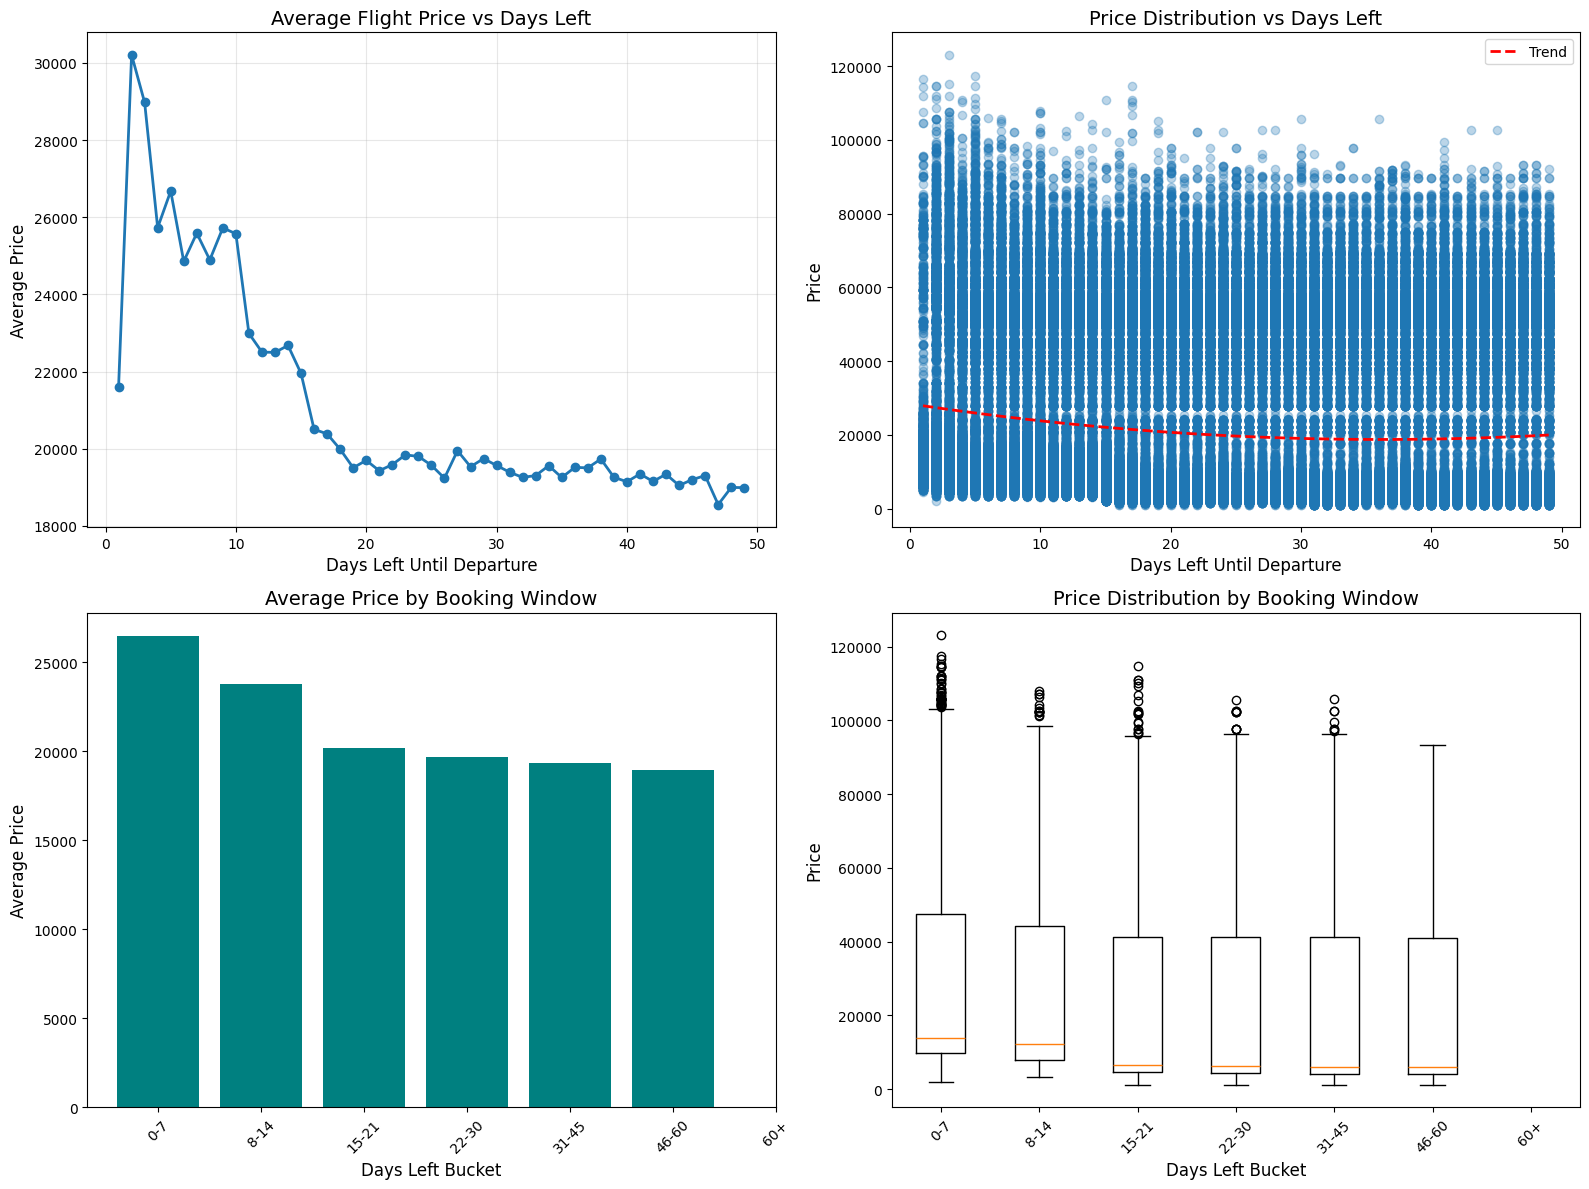


*** RECOMMENDATION ***
Best booking window: 47 days before departure
Average price at optimal window: ₹18553.27

General recommendations:
- Book 21-45 days in advance for best prices
- Avoid booking within 7 days (premium surge)
- Prices stabilize around 30-45 days before departure


In [6]:
# 9: Flight Price Prediction Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
df = pd.read_csv('flight_price.csv')

# Print columns to debug KeyError
print("DataFrame columns:", df.columns)

# Data preprocessing
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['Days_Left'] = pd.to_numeric(df['days_left'], errors='coerce') # Corrected column name
df = df.dropna(subset=['price', 'Days_Left'])

# Part (a): Price variation with days left
days_price = df.groupby('Days_Left')['price'].agg(['mean', 'median', 'std', 'count'])
days_price = days_price.sort_index()

print("Price Statistics by Days Left Until Departure:")
print(days_price.head(15))

# Identify exponential surge
price_change = days_price['mean'].pct_change() * 100
surge_days = price_change[price_change > 50].index.tolist()

print(f"\nExponential price surges detected at: {surge_days} days before departure")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Line plot of average price
axes[0, 0].plot(days_price.index, days_price['mean'], marker='o', linewidth=2)
axes[0, 0].set_xlabel('Days Left Until Departure', fontsize=12)
axes[0, 0].set_ylabel('Average Price', fontsize=12)
axes[0, 0].set_title('Average Flight Price vs Days Left', fontsize=14)
axes[0, 0].grid(True, alpha=0.3)

# Scatter plot with trend
axes[0, 1].scatter(df['Days_Left'], df['price'], alpha=0.3)
z = np.polyfit(df['Days_Left'], df['price'], 2)
p = np.poly1d(z)
x_trend = np.linspace(df['Days_Left'].min(), df['Days_Left'].max(), 100)
axes[0, 1].plot(x_trend, p(x_trend), "r--", linewidth=2, label='Trend')
axes[0, 1].set_xlabel('Days Left Until Departure', fontsize=12)
axes[0, 1].set_ylabel('Price', fontsize=12)
axes[0, 1].set_title('Price Distribution vs Days Left', fontsize=14)
axes[0, 1].legend()

# Heatmap of price by days left buckets
df['Days_Bucket'] = pd.cut(df['Days_Left'], bins=[0, 7, 14, 21, 30, 45, 60, 100],
                             labels=['0-7', '8-14', '15-21', '22-30', '31-45', '46-60', '60+'])
bucket_prices = df.groupby('Days_Bucket')['price'].mean()
axes[1, 0].bar(range(len(bucket_prices)), bucket_prices.values, color='teal')
axes[1, 0].set_xticks(range(len(bucket_prices)))
axes[1, 0].set_xticklabels(bucket_prices.index, rotation=45)
axes[1, 0].set_xlabel('Days Left Bucket', fontsize=12)
axes[1, 0].set_ylabel('Average Price', fontsize=12)
axes[1, 0].set_title('Average Price by Booking Window', fontsize=14)

# Box plot
axes[1, 1].boxplot([df[df['Days_Bucket'] == bucket]['price'].values
                     for bucket in bucket_prices.index])
axes[1, 1].set_xticklabels(bucket_prices.index, rotation=45)
axes[1, 1].set_xlabel('Days Left Bucket', fontsize=12)
axes[1, 1].set_ylabel('Price', fontsize=12)
axes[1, 1].set_title('Price Distribution by Booking Window', fontsize=14)

plt.tight_layout()
plt.show()

# Recommendation
optimal_days = days_price['mean'].idxmin()
print(f"\n*** RECOMMENDATION ***")
print(f"Best booking window: {optimal_days} days before departure")
print(f"Average price at optimal window: ₹{days_price.loc[optimal_days, 'mean']:.2f}")
print(f"\nGeneral recommendations:")
print("- Book 21-45 days in advance for best prices")
print("- Avoid booking within 7 days (premium surge)")
print("- Prices stabilize around 30-45 days before departure")

# Part (b): Airline price comparison for specific route
route = 'Delhi-Mumbai'  # Adjust based on your dataset structure
if 'Route' in df.columns:
    route_df = df[df['Route'] == route]

    airline_prices = route_df.groupby('Airline')['price'].agg(['mean', 'median', 'min', 'max', 'count'])
    airline_prices = airline_prices.sort_values('mean')

    print(f"\n{'='*60}")
    print(f"Price Comparison for {route} Route:")
    print(airline_prices)

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Bar plot
    axes[0].barh(airline_prices.index, airline_prices['mean'], color='steelblue')
    axes[0].set_xlabel('Average Price', fontsize=12)
    axes[0].set_ylabel('Airline', fontsize=12)
    axes[0].set_title(f'Average Price by Airline - {route}', fontsize=14)

    # Box plot
    route_df.boxplot(column='price', by='Airline', ax=axes[1], rot=90)
    axes[1].set_xlabel('Airline', fontsize=12)
    axes[1].set_ylabel('Price', fontsize=12)
    axes[1].set_title(f'Price Distribution by Airline - {route}', fontsize=14)
    plt.suptitle('')

    plt.tight_layout()
    plt.show()

    print("\nCheapest Airlines:")
    print(airline_prices.head(3)['mean'])
    print("\nPremium Airlines:")
    print(airline_prices.tail(3)['mean'])

    print("\nPossible Reasons for Price Differences:")
    print("Budget airlines: IndiGo, SpiceJet, GoAir")
    print("  - No frills service, point-to-point routes")
    print("  - Higher seat density, quick turnarounds")
    print("Premium airlines: Vistara, Air India")
    print("  - Better service, lounges, meals included")
    print("  - Brand positioning, business travelers")

In [8]:
# 10: HR Analytics Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load dataset
df = pd.read_csv('hr_analytics.csv')

# Assuming column names: Attrition, Satisfaction, OverTime, Salary, NumberOfProjects, etc.
# Adjust column names based on your actual dataset

print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nAttrition Distribution:")
# The column name 'Attrition' was not found. Using 'left' which typically indicates attrition in such datasets.
print(df['left'].value_counts())

# Part (a): Factors correlating with attrition

# Encode categorical variables if needed
# Renaming 'left' to 'Attrition' for consistency with problem description if preferred, or just use 'left'
# For now, let's assume 'left' is the target variable for attrition.
if df['left'].dtype == 'int64': # 'left' column is usually 0 or 1 for no/yes attrition
    df['Attrition_Binary'] = df['left']
else:
    # If 'left' was string, e.g., 'Yes'/'No', you would map it. Assuming it's 0/1 for now.
    pass


Dataset Shape: (14999, 10)

Column Names: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Attrition Distribution:
left
0    11428
1     3571
Name: count, dtype: int64
